## Imports

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import missingno as msno

## configs and methods

In [21]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

## Checking data completness

In [5]:
os.listdir('./data')

['bundesliga', 'la liga', 'ligue 1', 'premier league', 'serie a']

In [12]:
def check_columns():
    first_file_cols = None

    for folder in os.listdir('./data'):
        for file in os.listdir(f'./data/{folder}'):
            data = pd.read_csv(f'./data/{folder}/{file}')
            num_of_cols = data.shape[1]

            if first_file_cols is None:
                first_file_cols = num_of_cols
            elif first_file_cols != num_of_cols:
                return 'There is some mismatch somewhere in csvs'
    
    return 'Number of columns are matching'

In [13]:
check_columns()

'Number of columns are matching'

## Data preparation

In [14]:
data = pd.DataFrame()

for folder in os.listdir('./data'):
    for file in os.listdir(f'./data/{folder}'):
        df = pd.read_csv(f'./data/{folder}/{file}')
        data = pd.concat([data, df], ignore_index=True)

## Basic data description

In [16]:
data.shape

(25945, 66)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25945 entries, 0 to 25944
Data columns (total 66 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   timestamp                            25945 non-null  int64  
 1   date_GMT                             25945 non-null  object 
 2   status                               25945 non-null  object 
 3   attendance                           20594 non-null  float64
 4   home_team_name                       25945 non-null  object 
 5   away_team_name                       25945 non-null  object 
 6   referee                              16175 non-null  object 
 7   Game Week                            25184 non-null  float64
 8   Pre-Match PPG (Home)                 25945 non-null  float64
 9   Pre-Match PPG (Away)                 25945 non-null  float64
 10  home_ppg                             25945 non-null  float64
 11  away_ppg                    

In [22]:
data.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_goal_timings,away_team_goal_timings,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,Home Team Pre-Match xG,Away Team Pre-Match xG,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,over_15_2HG_percentage_pre_match,over_05_2HG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1249669800,Aug 07 2009 - 6:30pm,complete,NaN,Wolfsburg,Stuttgart,Felix Brych,1.0,0.0,0.0,1.35,1.53,2,0,2,0,0,0,"71,82",NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VOLKSWAGEN ARENA (Wolfsburg)
1,1249738200,Aug 08 2009 - 1:30pm,complete,NaN,Borussia Dortmund,Köln,Wolfgang Stark,1.0,0.0,0.0,2.00,1.35,1,0,1,0,0,0,75,NaN,-1,-1,0,0,1,0,0,0,0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Signal-Iduna-Park (Dortmund)
2,1249738200,Aug 08 2009 - 1:30pm,complete,NaN,Nürnberg,Schalke 04,Knut Kircher,1.0,0.0,0.0,1.12,1.76,1,2,3,1,0,1,88,"36,50",-1,-1,2,0,1,0,1,1,0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Max-Morlock-Stadion (Nürnberg)
3,1249738200,Aug 08 2009 - 1:30pm,complete,NaN,Werder Bremen,Eintracht Frankfurt,NaN,1.0,0.0,0.0,1.76,1.18,2,3,5,4,2,2,"13,44","6,42,71",-1,-1,2,1,2,0,1,2,0,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wohninvest WESERSTADION (Bremen)
4,1249738200,Aug 08 2009 - 1:30pm,complete,NaN,Hertha BSC,Hannover 96,Guido Winkmann,1.0,0.0,0.0,0.53,0.82,1,0,1,0,0,0,82,NaN,-1,-1,3,0,2,0,0,3,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Olympiastadion Berlin (Berlin)


### empties

In [27]:
pd.DataFrame({
    'ilość braków danych': data.isna().sum(),
    'procentowa ilość braków danych': data.isna().sum() / len(data)
})

,ilość braków danych,procentowa ilość braków danych
timestamp,0,0.000000
date_GMT,0,0.000000
status,0,0.000000
attendance,5351,0.206244
home_team_name,0,0.000000
away_team_name,0,0.000000
referee,9770,0.376566
Game Week,761,0.029331
Pre-Match PPG (Home),0,0.000000
Pre-Match PPG (Away),0,0.000000


<Axes: >

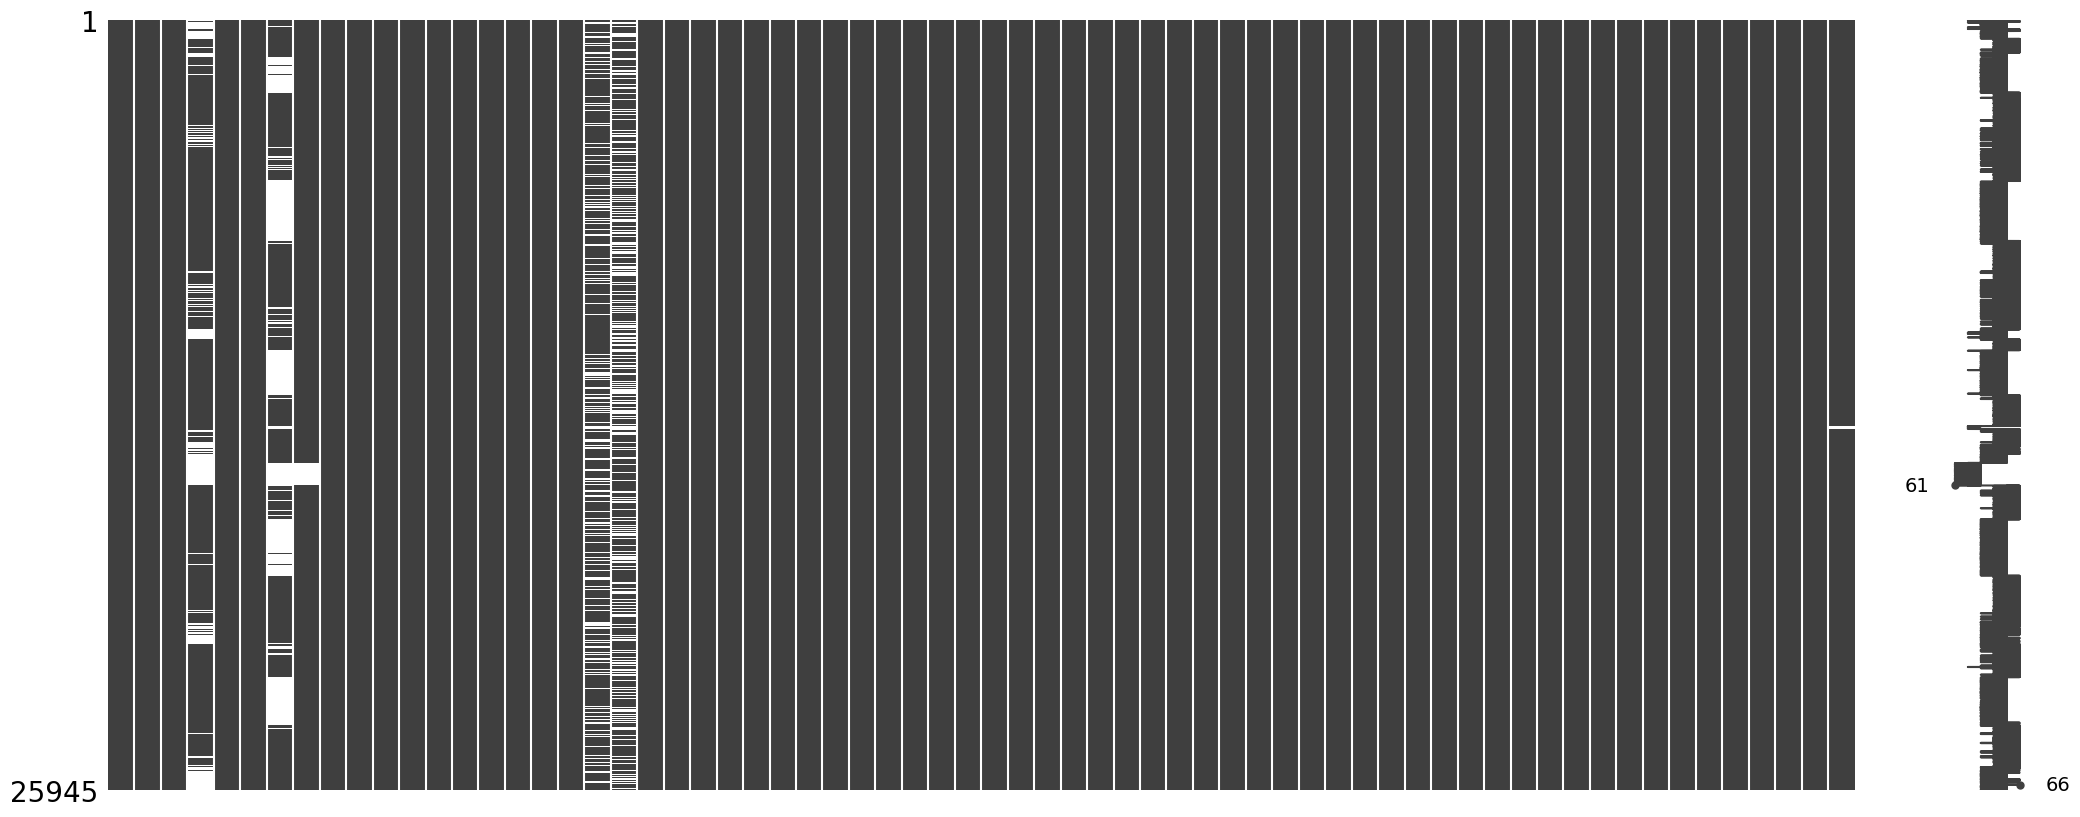

In [29]:
msno.matrix(data)

<Axes: >

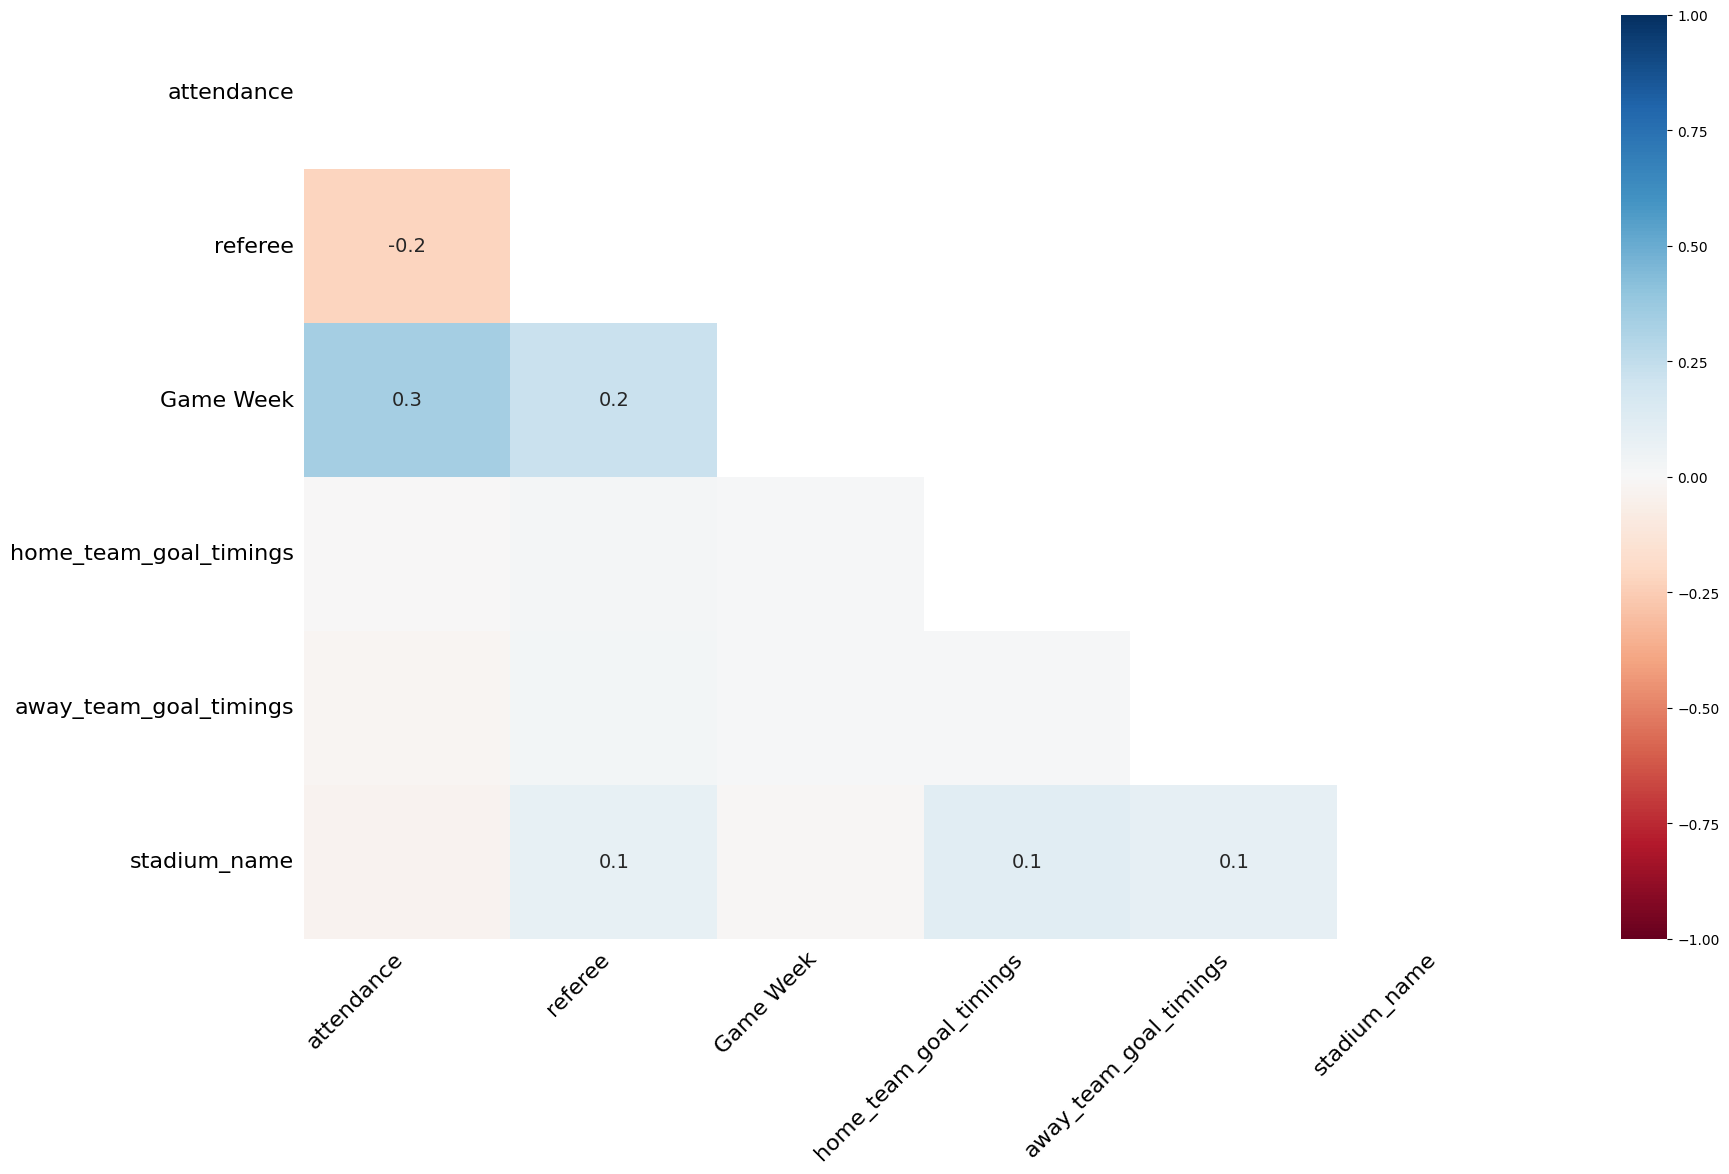

In [30]:
msno.heatmap(data)